In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Normalization Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Deep Learning Pytorch Library
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
torch.cuda.is_available()
torch.cuda.get_device_name(0)

'GeForce GTX 1050'

# Data Pre-Processing

In [2]:
df = pd.read_csv('simu_data_cleaned.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
#df.drop('/out+ Y', axis = 1, inplace = True)
df.head()

,/out- X,/out- Y,/out+ Y,/net2 Y,/net02 Y,/net07 Y
0,0.000000,0.070629,0.070629,0.250000,0.25,0.0
1,0.000361,0.070796,0.070541,0.250227,0.25,0.0
2,0.000527,0.070895,0.070489,0.250331,0.25,0.0
3,0.000859,0.071116,0.070372,0.250540,0.25,0.0
4,0.001158,0.071330,0.070259,0.250727,0.25,0.0


####  Prepare the data

In [3]:
## Perform Train/Test/Split

X = df.drop(['/out- Y', '/out+ Y'],axis=1).values
y = df[['/out- Y', '/out+ Y']].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=33, shuffle = False)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.15,random_state=33, shuffle = False)

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
X_val = torch.FloatTensor(X_val)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)
y_val = torch.FloatTensor(y_val)

# Define the Model

In [1]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=200, h2=150, out_features=2):
        super().__init__()
        
        # input layer -> 1 hidden -> 2 hidden -> output 
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        # Pass the neuron input through its activation function to obtain the output of the neuron
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

NameError: name 'nn' is not defined

#### Define the Model, Loss and Optimizer

In [5]:
torch.manual_seed(4)
model = Model()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#### Train The Model

In [6]:
epochs = 400 # number of runs through the training data
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%100 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad() #zero-grad to not accomulate the gradient over the epochs
    loss.backward()
    optimizer.step()

epoch:  1  loss: 0.00811940
epoch: 101  loss: 0.00000198
epoch: 201  loss: 0.00000114
epoch: 301  loss: 0.00000091


# Results on the Training Set

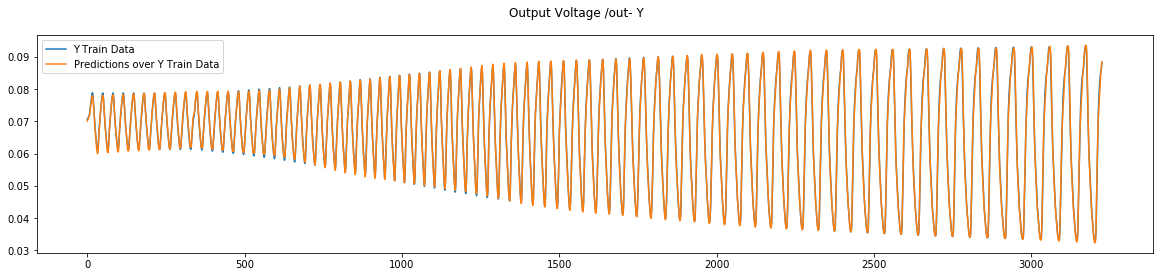

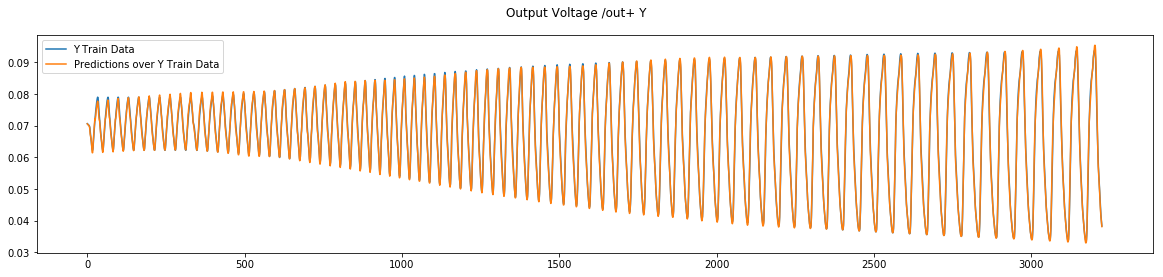

In [7]:
plt.figure(figsize=(20,4))
plt.plot(y_train.data.numpy()[:,0], label="Y Train Data")
plt.plot(y_pred.data.numpy()[:,0], label="Predictions over Y Train Data")
plt.suptitle('Output Voltage /out- Y')
plt.legend()
plt.show()

plt.figure(figsize=(20,4))
plt.plot(y_train.data.numpy()[:,1], label="Y Train Data")
plt.plot(y_pred.data.numpy()[:,1], label="Predictions over Y Train Data")
plt.suptitle('Output Voltage /out+ Y')
plt.legend()
plt.show()

In [8]:
print("Mean Squared Error for Test /out- Y: %.5E" % (mean_squared_error(y_train.data.numpy()[:,0], y_pred.data.numpy()[:,0])))
print("Mean Squared Error for Test /out+ Y: %.5E" % (mean_squared_error(y_train.data.numpy()[:,1], y_pred.data.numpy()[:,1])))

Mean Squared Error for Test /out- Y: 7.64219E-07
Mean Squared Error for Test /out+ Y: 8.54377E-07


# Results on the Validation Set

In [9]:
model.eval()
with torch.no_grad():
    y_val_pred = model.forward(X_val)
    loss = criterion(y_val_pred, y_val)

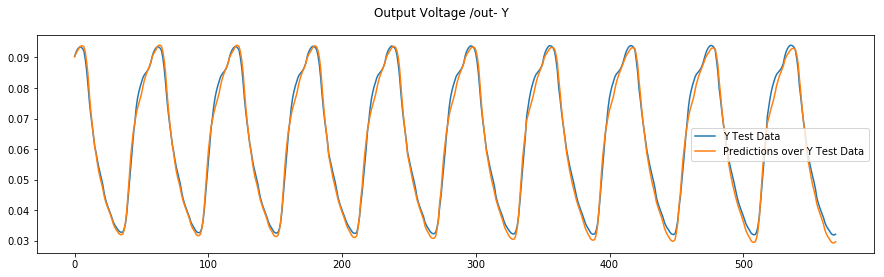

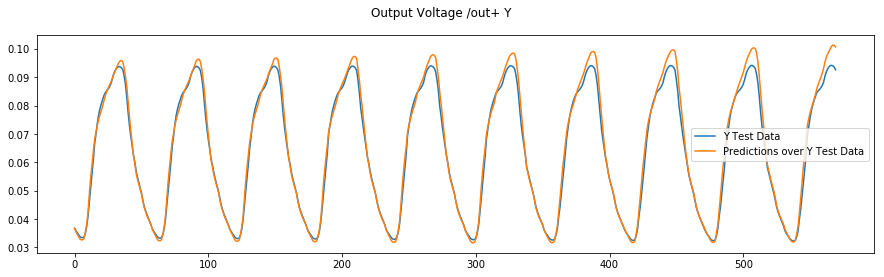

In [10]:
plt.figure(figsize=(15,4))
plt.plot(y_val.data.numpy()[:,0], label="Y Test Data")
plt.plot(y_val_pred.data.numpy()[:,0], label="Predictions over Y Test Data")
plt.suptitle('Output Voltage /out- Y')
plt.legend()
plt.show()

plt.figure(figsize=(15,4))
plt.plot(y_val.data.numpy()[:,1], label="Y Test Data")
plt.plot(y_val_pred.data.numpy()[:,1], label="Predictions over Y Test Data")
plt.suptitle('Output Voltage /out+ Y')
plt.legend()
plt.show()

In [11]:
print("Mean Squared Error for Test /out- Y: %.5E" % (mean_squared_error(y_val_pred.data.numpy()[:,0], y_val.data.numpy()[:,0])))
print("Mean Squared Error for Test /out+ Y: %.5E" % (mean_squared_error(y_val_pred.data.numpy()[:,1], y_val.data.numpy()[:,1])))

Mean Squared Error for Test /out- Y: 3.70383E-06
Mean Squared Error for Test /out+ Y: 6.64302E-06


# Results on the Test Set

In [12]:
model.eval()
with torch.no_grad():
    y_test_pred = model.forward(X_test)
    loss = criterion(y_test_pred, y_test)

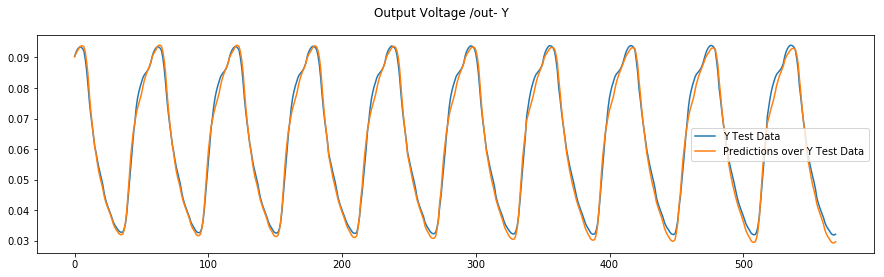

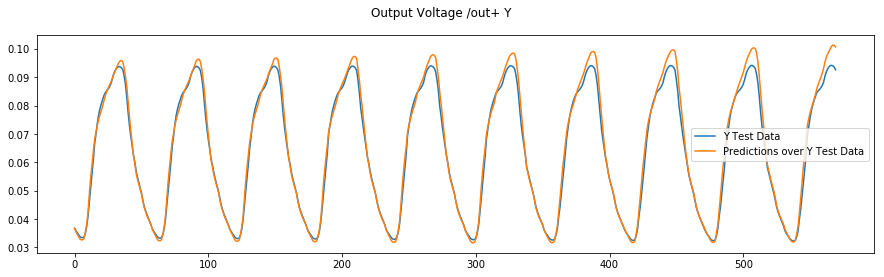

In [13]:
plt.figure(figsize=(15,4))
plt.plot(y_val.data.numpy()[:,0], label="Y Test Data")
plt.plot(y_val_pred.data.numpy()[:,0], label="Predictions over Y Test Data")
plt.suptitle('Output Voltage /out- Y')
plt.legend()
plt.show()

plt.figure(figsize=(15,4))
plt.plot(y_val.data.numpy()[:,1], label="Y Test Data")
plt.plot(y_val_pred.data.numpy()[:,1], label="Predictions over Y Test Data")
plt.suptitle('Output Voltage /out+ Y')
plt.legend()
plt.show()

In [14]:
print("Mean Squared Error for Test /out- Y: %.5E" % (mean_squared_error(y_test_pred.data.numpy()[:,0], y_test.data.numpy()[:,0])))
print("Mean Squared Error for Test /out+ Y: %.5E" % (mean_squared_error(y_test_pred.data.numpy()[:,1], y_test.data.numpy()[:,1])))

Mean Squared Error for Test /out- Y: 4.83409E-06
Mean Squared Error for Test /out+ Y: 3.11934E-05
